In [2]:
from src.data_download import initialize_gee, download_dem
from src.calculations import calculate_terrain_attributes
from src.plotting import plot_all_bands, plot_individual_attribute
from src.utils import tiff_to_xarray, combine_xarrays
import os
import matplotlib.pyplot as plt

In [ ]:
# Инициализируем GEE
initialize_gee(project='projectomela')

# Определим координаты и названия файлов
lat, lon = 55.600, 37.172
buffer = 0.1
dem_file_name = "srtm.tif"
directory = "example_output"

# Загрузим DEM из GEE (DEM сохранится в tiff файл в директории directory)
dem_xarray = download_dem(lat, lon, buffer, dem_file_name, directory)
# Путь к DEM файлу
dem_path = os.path.join(directory, dem_file_name)
attributes = [
    'slope', 'hillshade', 'aspect', 'curvature', 'planform_curvature', 'profile_curvature',
    'maximum_curvature', 'topographic_position_index', 'terrain_ruggedness_index',
    'roughness', 'rugosity'
]

russian_titles = {
    'reprojected_dem': 'ЦМР',
    'slope': 'Уклон',
    'hillshade': 'Теневой рельеф',
    'aspect': 'Азимут (направление склона)',
    'curvature': 'Кривизна',
    'planform_curvature': 'Плановая кривизна',
    'profile_curvature': 'Профильная кривизна',
    'maximum_curvature': 'Максимальная кривизна',
    'topographic_position_index': 'Индекс топографического положения',
    'terrain_ruggedness_index': 'Индекс шероховатости рельефа',
    'roughness': 'Шероховатость',
    'rugosity': 'Ругозность'
}

# Получаем список из len(attributes) + 1 объектов Xarray; также сохраняем их как GeoTIFF файлы
attribute_xarrays = calculate_terrain_attributes(dem_path, attributes, directory)
combined_xarray = combine_xarrays(attribute_xarrays, attributes)

TransportError: HTTPSConnectionPool(host='oauth2.googleapis.com', port=443): Max retries exceeded with url: /token (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D0EBA13B30>: Failed to resolve 'oauth2.googleapis.com' ([Errno 11001] getaddrinfo failed)"))

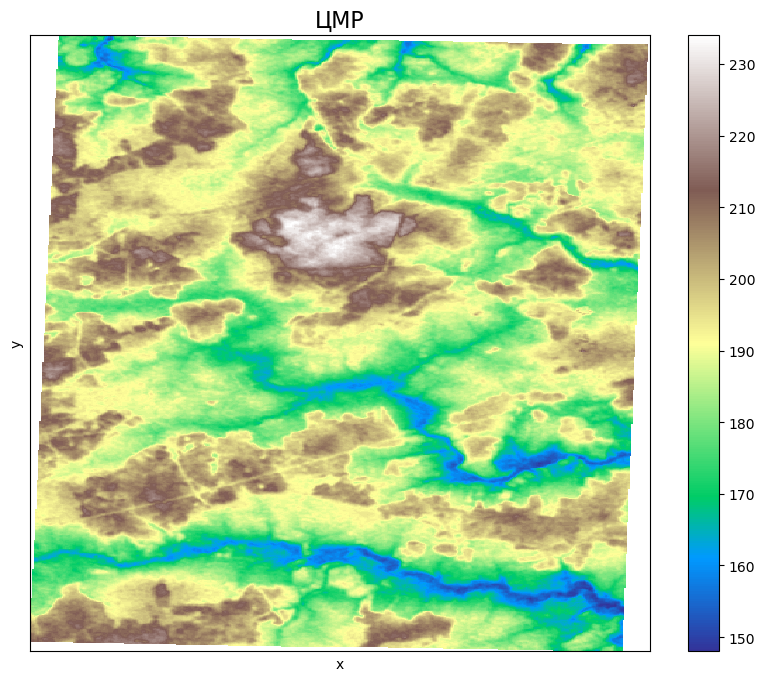

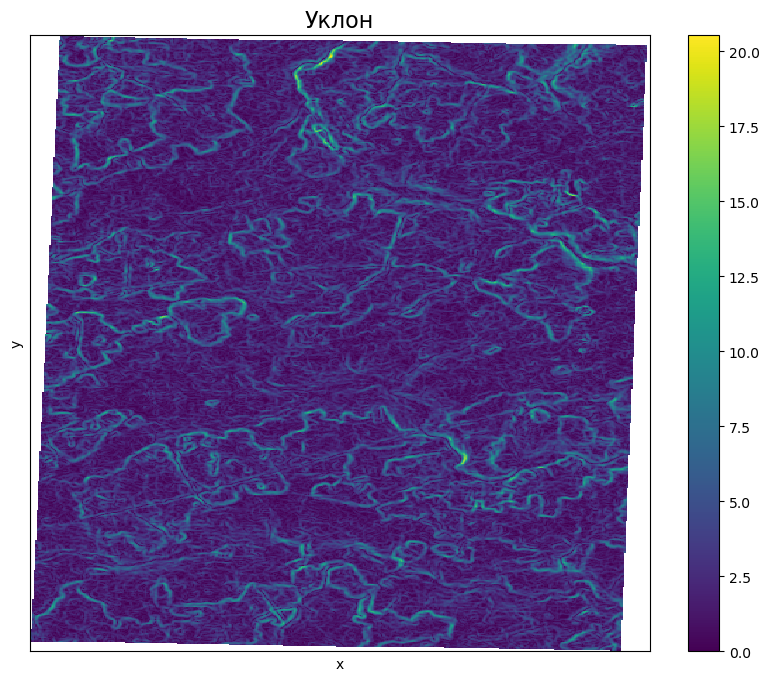

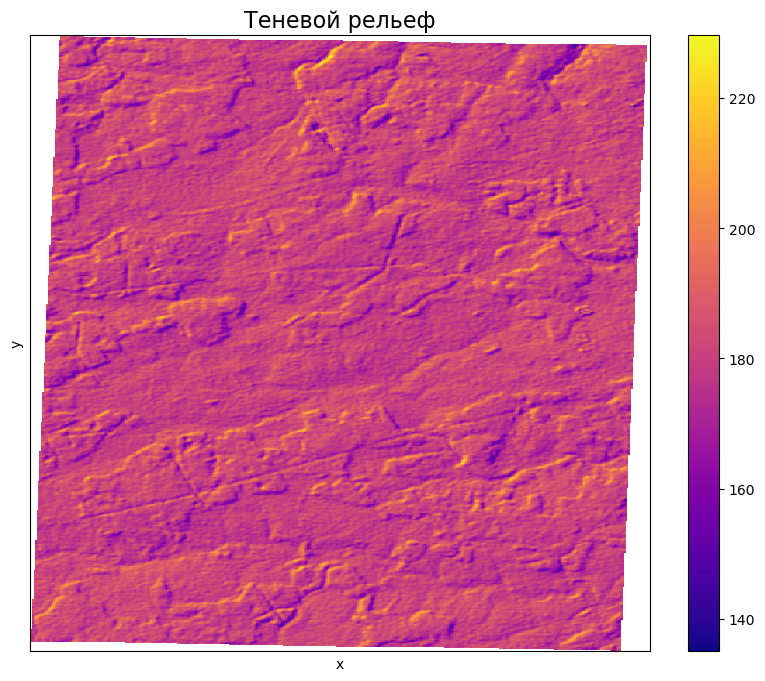

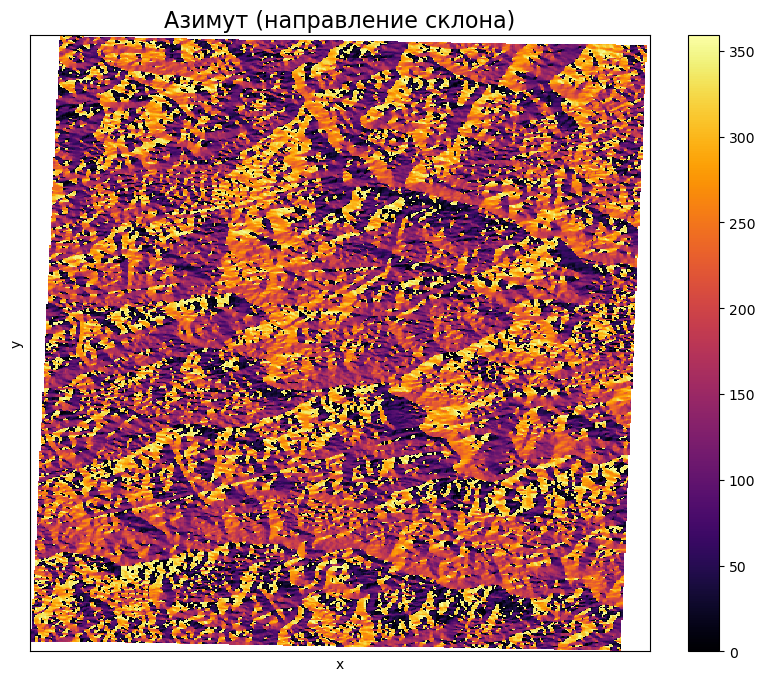

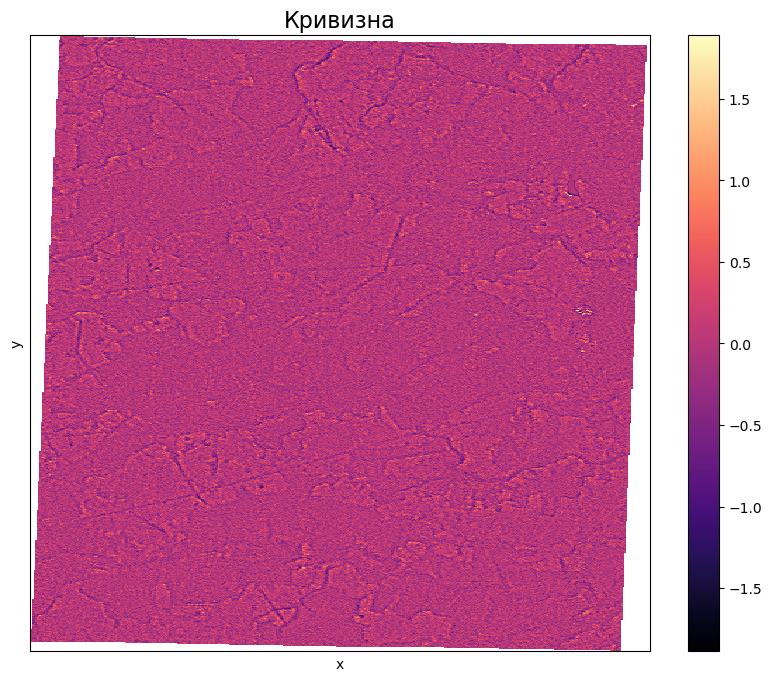

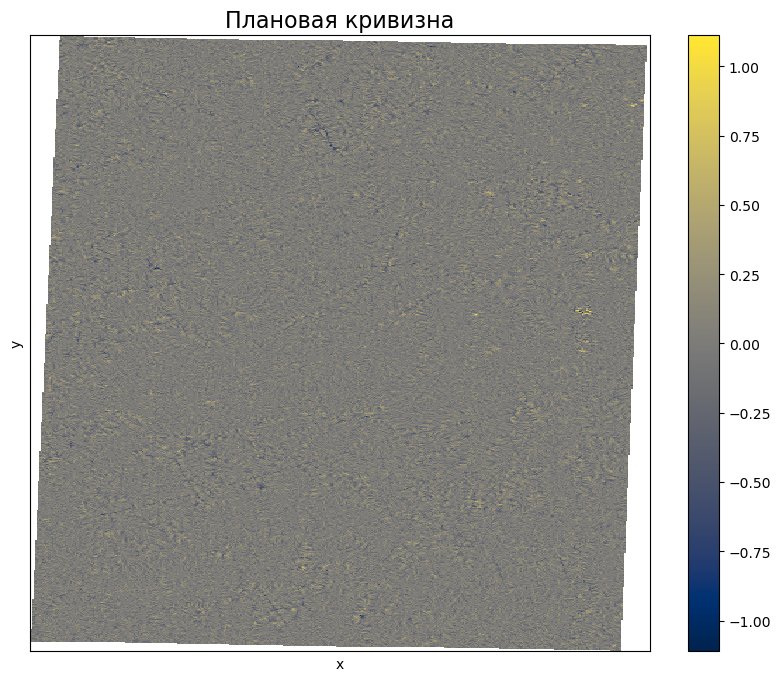

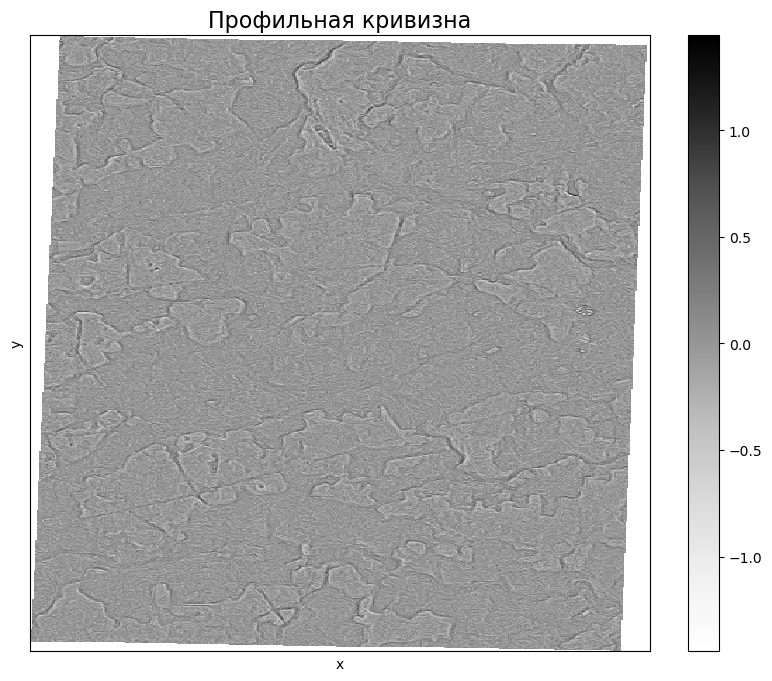

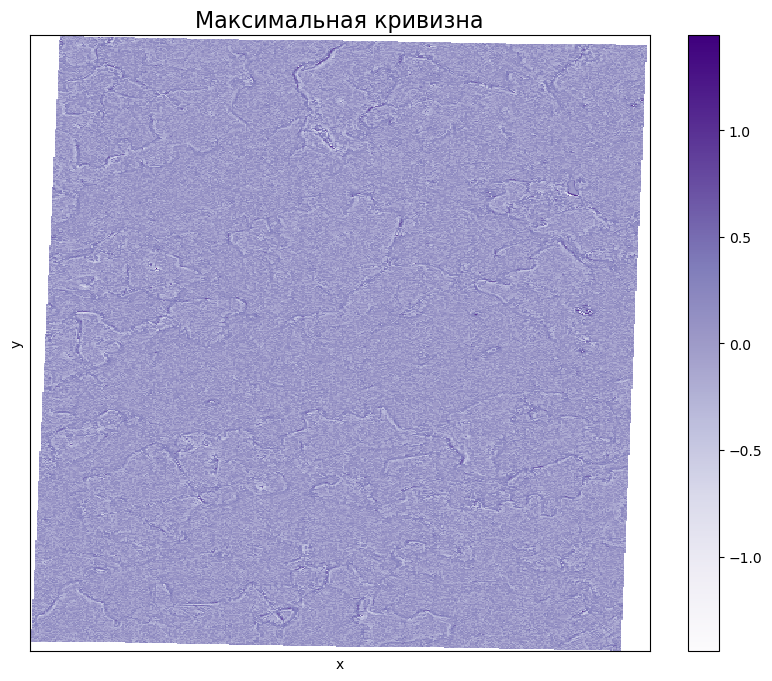

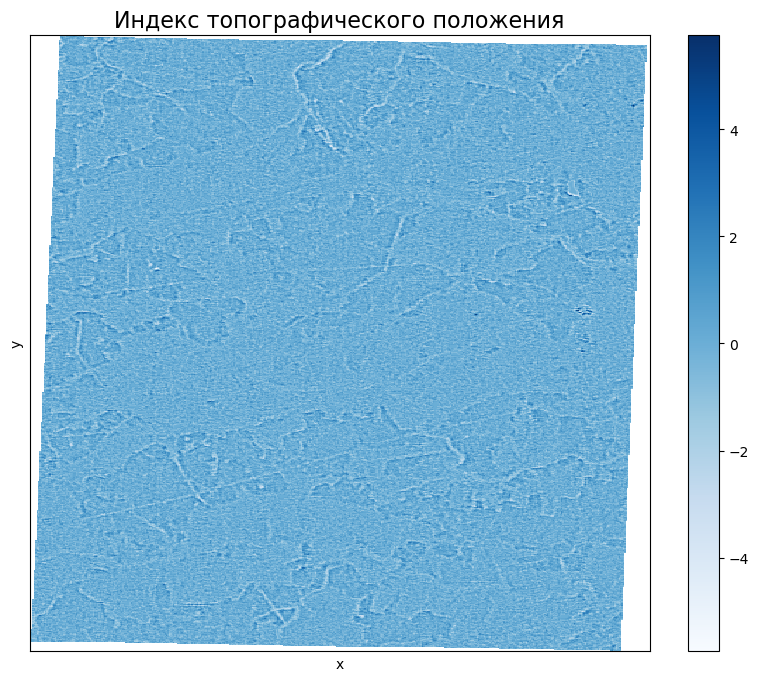

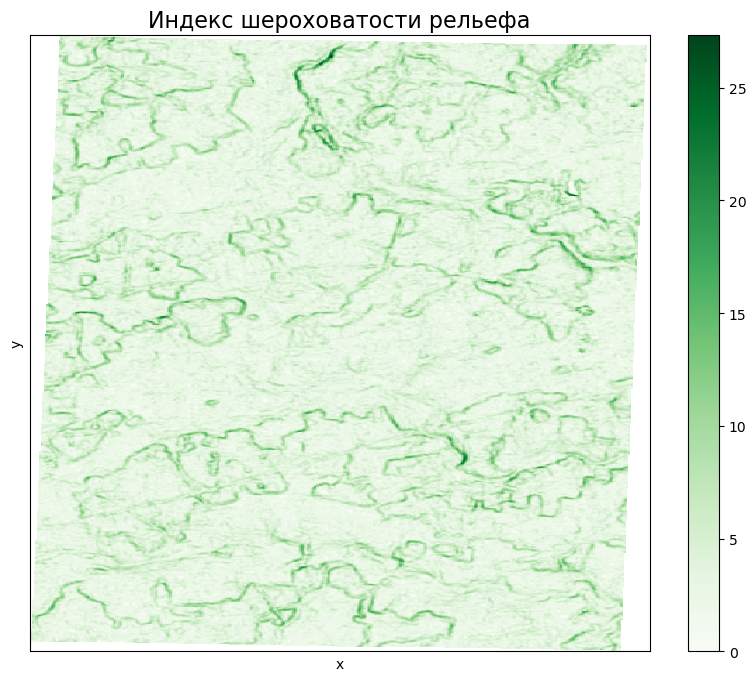

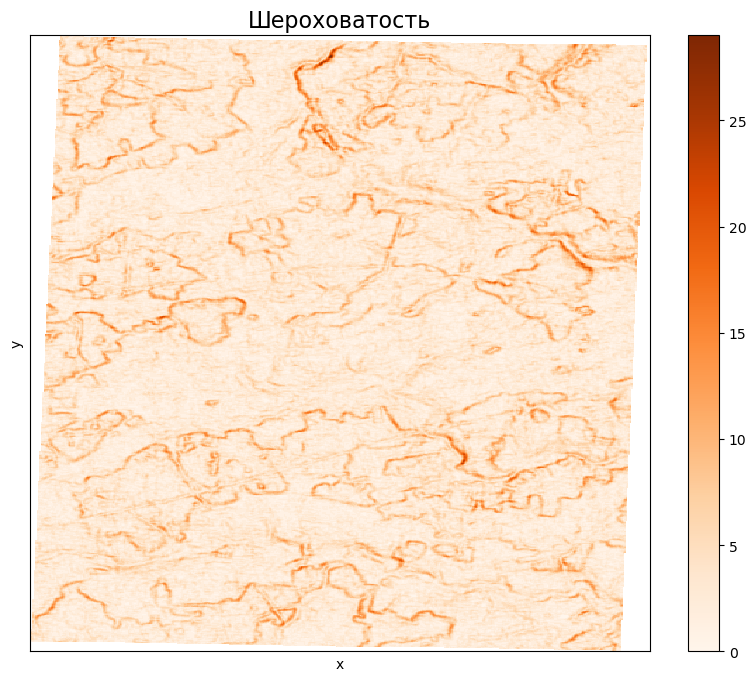

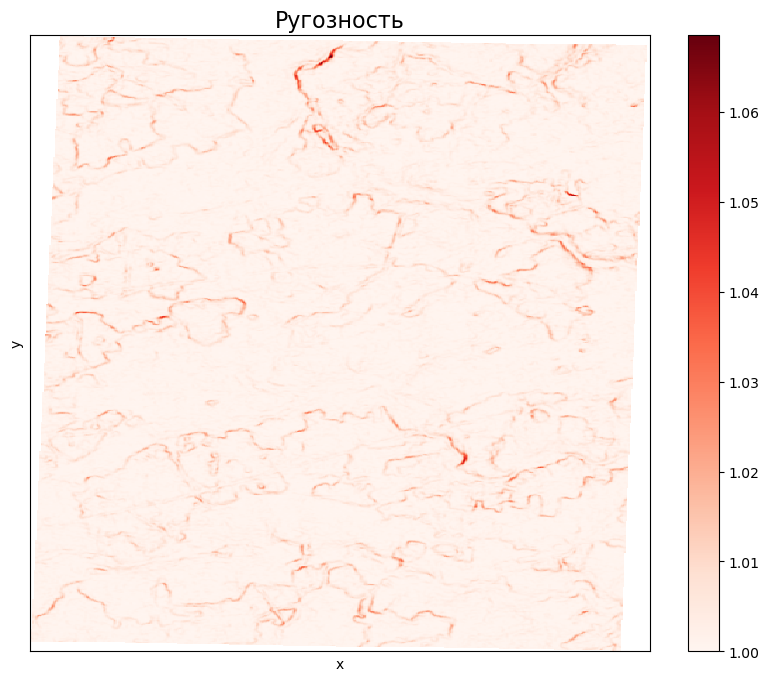

In [9]:
russian_titles = {
    'reprojected_dem': 'ЦМР',
    'slope': 'Уклон',
    'hillshade': 'Теневой рельеф',
    'aspect': 'Азимут (направление склона)',
    'curvature': 'Кривизна',
    'planform_curvature': 'Плановая кривизна',
    'profile_curvature': 'Профильная кривизна',
    'maximum_curvature': 'Максимальная кривизна',
    'topographic_position_index': 'Индекс топографического положения',
    'terrain_ruggedness_index': 'Индекс шероховатости рельефа',
    'roughness': 'Шероховатость',
    'rugosity': 'Ругозность'
}

cmaps = ["terrain", "viridis", "plasma", "inferno", "magma", "cividis", 
         "Greys", "Purples", "Blues", "Greens", "Oranges", "Reds"]

n_bands = combined_xarray.shape[0]

for i in range(n_bands):
    plt.figure(figsize=(10, 8))
    # Используем ту же цветовую карту, что и в plot_all_bands
    combined_xarray[i].plot(cmap=cmaps[i % len(cmaps)])
    # Получаем имя канала и его русское название из словаря
    band_name = combined_xarray.band.values[i]
    title = russian_titles.get(band_name, band_name)
    plt.title(title, fontsize=16)
    plt.xticks([])
    plt.yticks([])
    plt.show()